In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from PIL import Image #!conda install pillow --yes

sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
file_path = 'Data_Entry_2017.csv'
df = pd.read_csv(file_path)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [5]:
df['Patient Gender'].nunique(), df['Patient Gender'].unique()

(2, array(['M', 'F'], dtype=object))

In [6]:
df.shape, df.columns

((112120, 12),
 Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
        'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
        'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
       dtype='object'))

In [7]:
eda1_columns = ['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']
eda1_df = df[eda1_columns]

#create new columns for each decease
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

### Creating columns for different diseases

In [8]:
for pathology in pathology_list :
    eda1_df[pathology] = eda1_df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

/home/wabco/miniconda3/envs/aihcnd/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
eda1_df.head(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0


### Pneumonia distribution between male and female

Pneumonia positive and negative split is 
0    110689
1      1431
Name: Pneumonia, dtype: int64


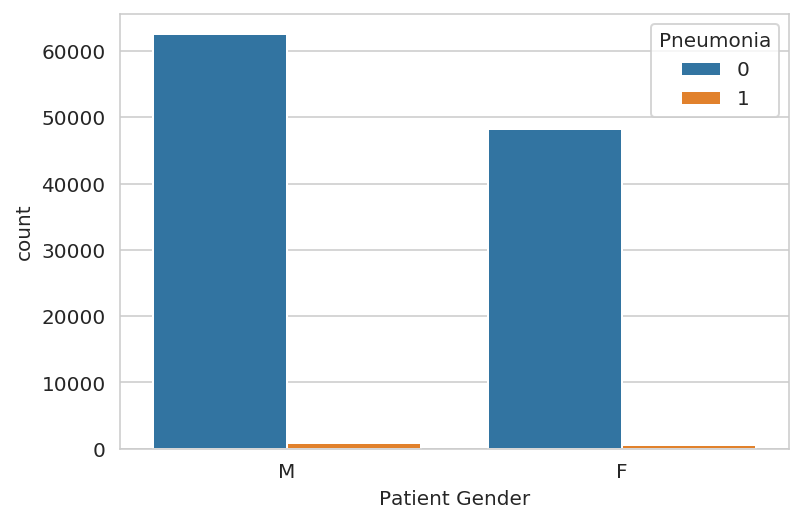

In [10]:
print('Pneumonia positive and negative split is ')
print(eda1_df['Pneumonia'].value_counts())
sns.countplot(x='Patient Gender', hue = 'Pneumonia', data=eda1_df)

The plot shows the highly imbalanced data split between pnuemonia and non pnemumonia cases; Some Sampling method to draw unbiased training and validation sets

### Plotting variation of diseases between male and female patients

In [11]:
#https://stackoverflow.com/questions/34830597/pandas-melt-function
data1 = pd.melt(eda1_df, id_vars=['Patient Gender'], value_vars = pathology_list, var_name = 'Category', value_name = 'Count')
print(data1.shape)
data1.head(5)

(1569680, 3)


,Patient Gender,Category,Count
0,M,Cardiomegaly,1
1,M,Cardiomegaly,1
2,M,Cardiomegaly,1
3,M,Cardiomegaly,0
4,F,Cardiomegaly,0


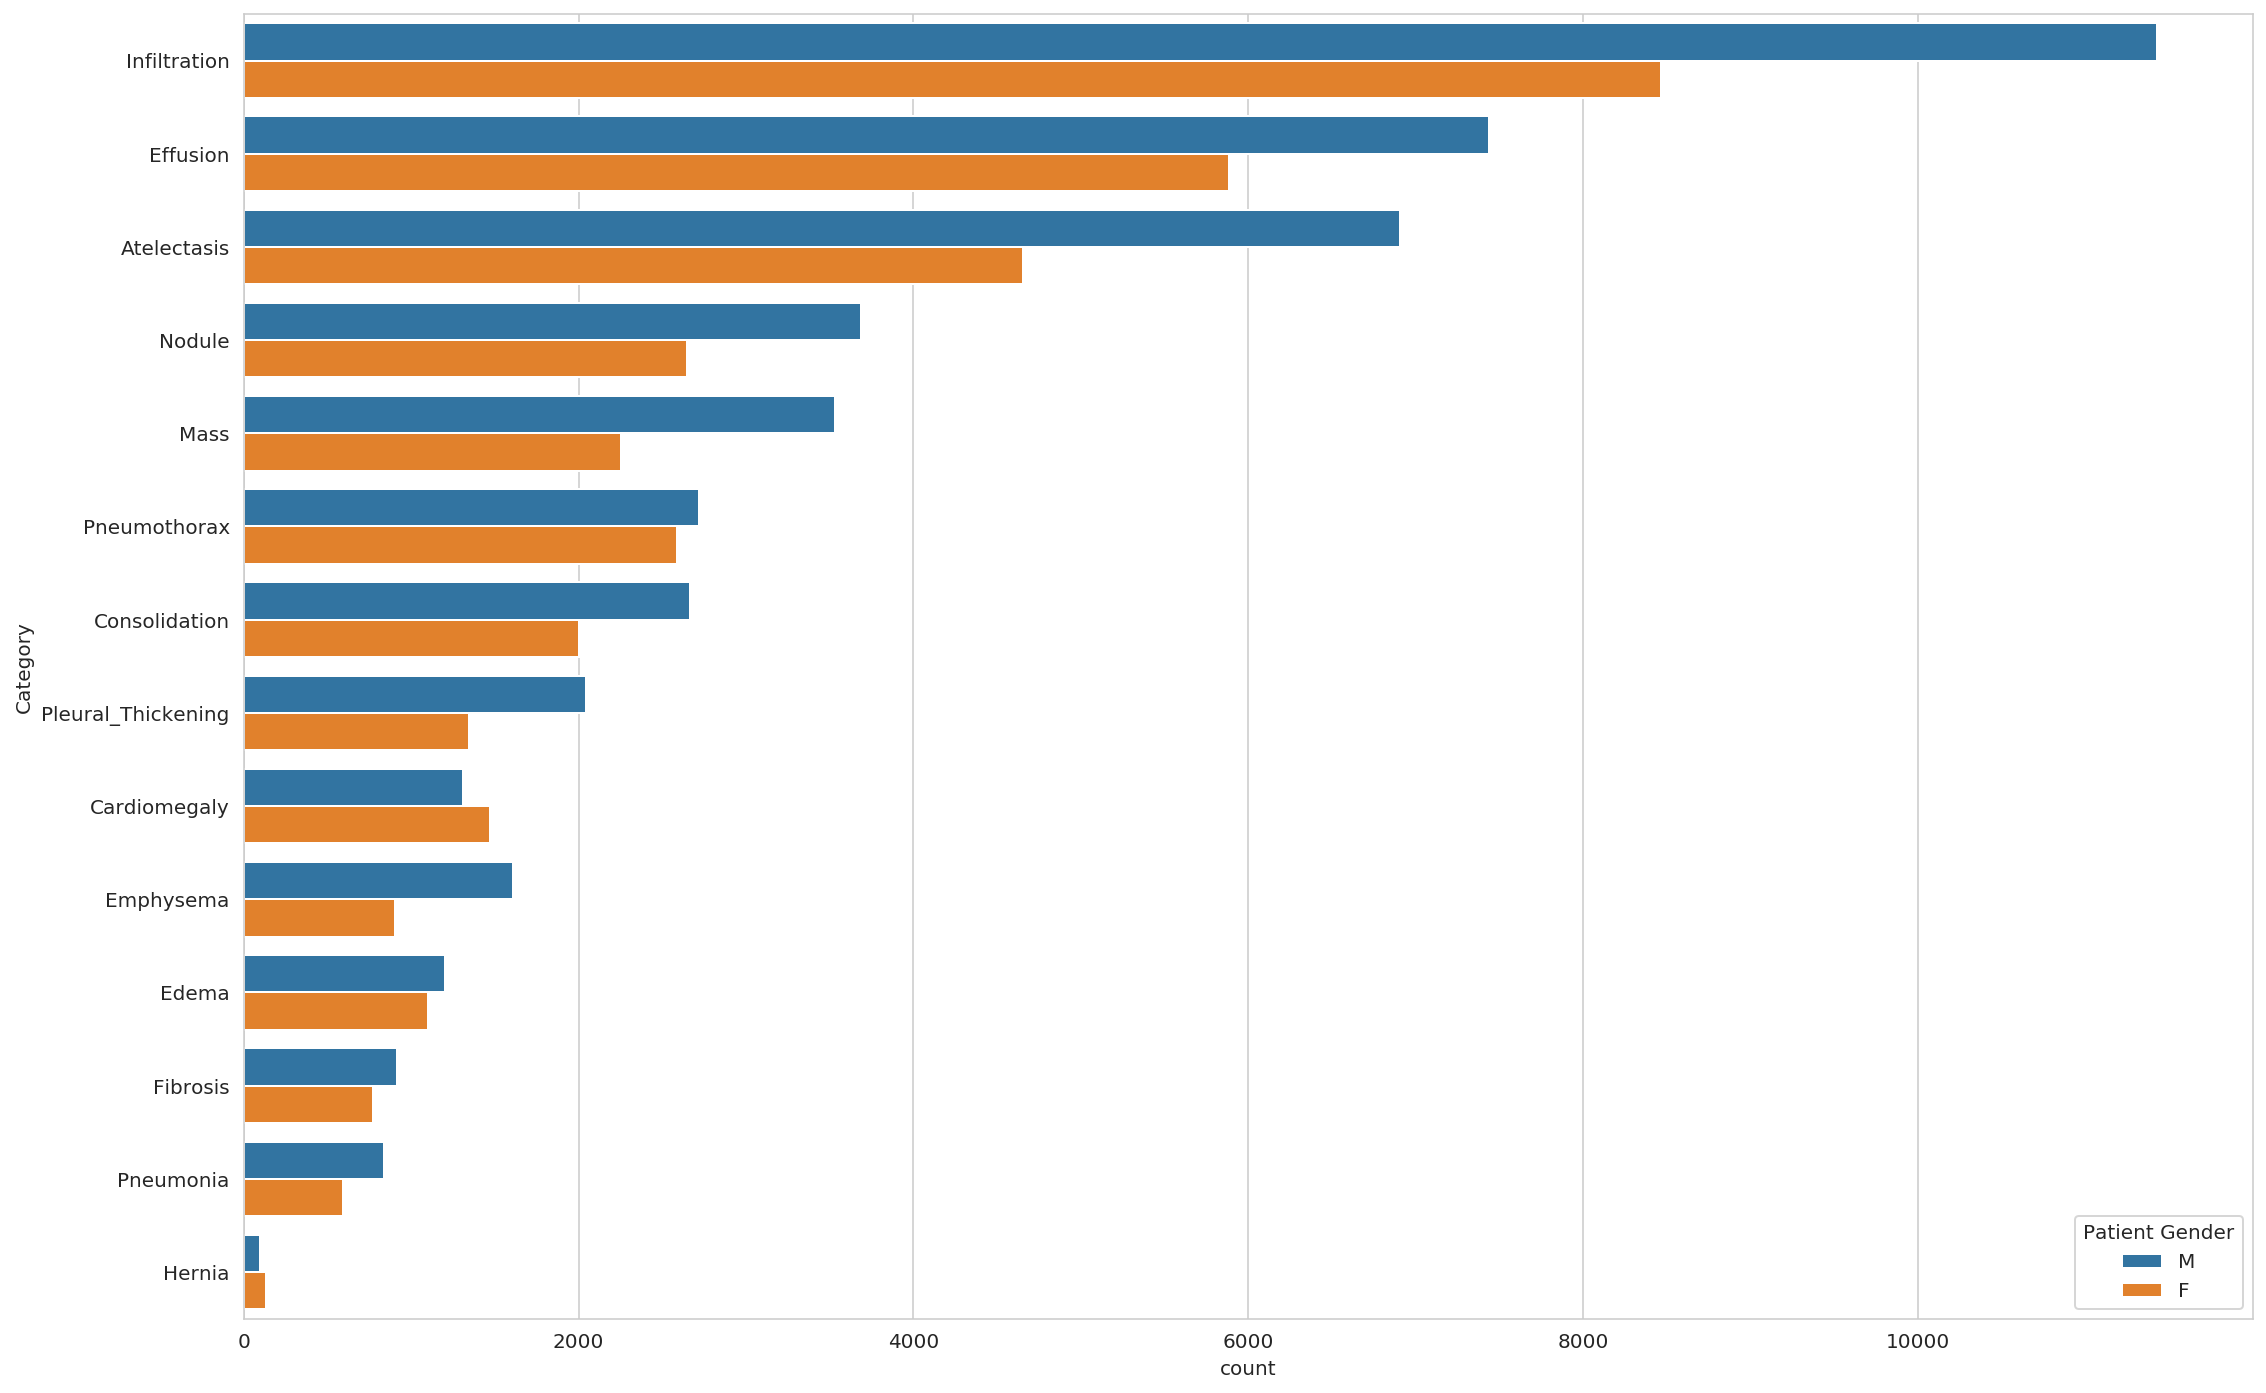

In [12]:
data1 = data1.loc[data1.Count>0]
plt.figure(figsize=(18,12))
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, order = data1['Category'].value_counts().index)

The above plot shows equal split between male and female patients over list of diseases; All diseases seem to have equal split between male and female.Pnemonia is quite lower in number compared to other diseases

### Gender distribution among patients and non-patients

Patients with and without diseases split is
1    60361
0    51759
Name: Nothing, dtype: int64


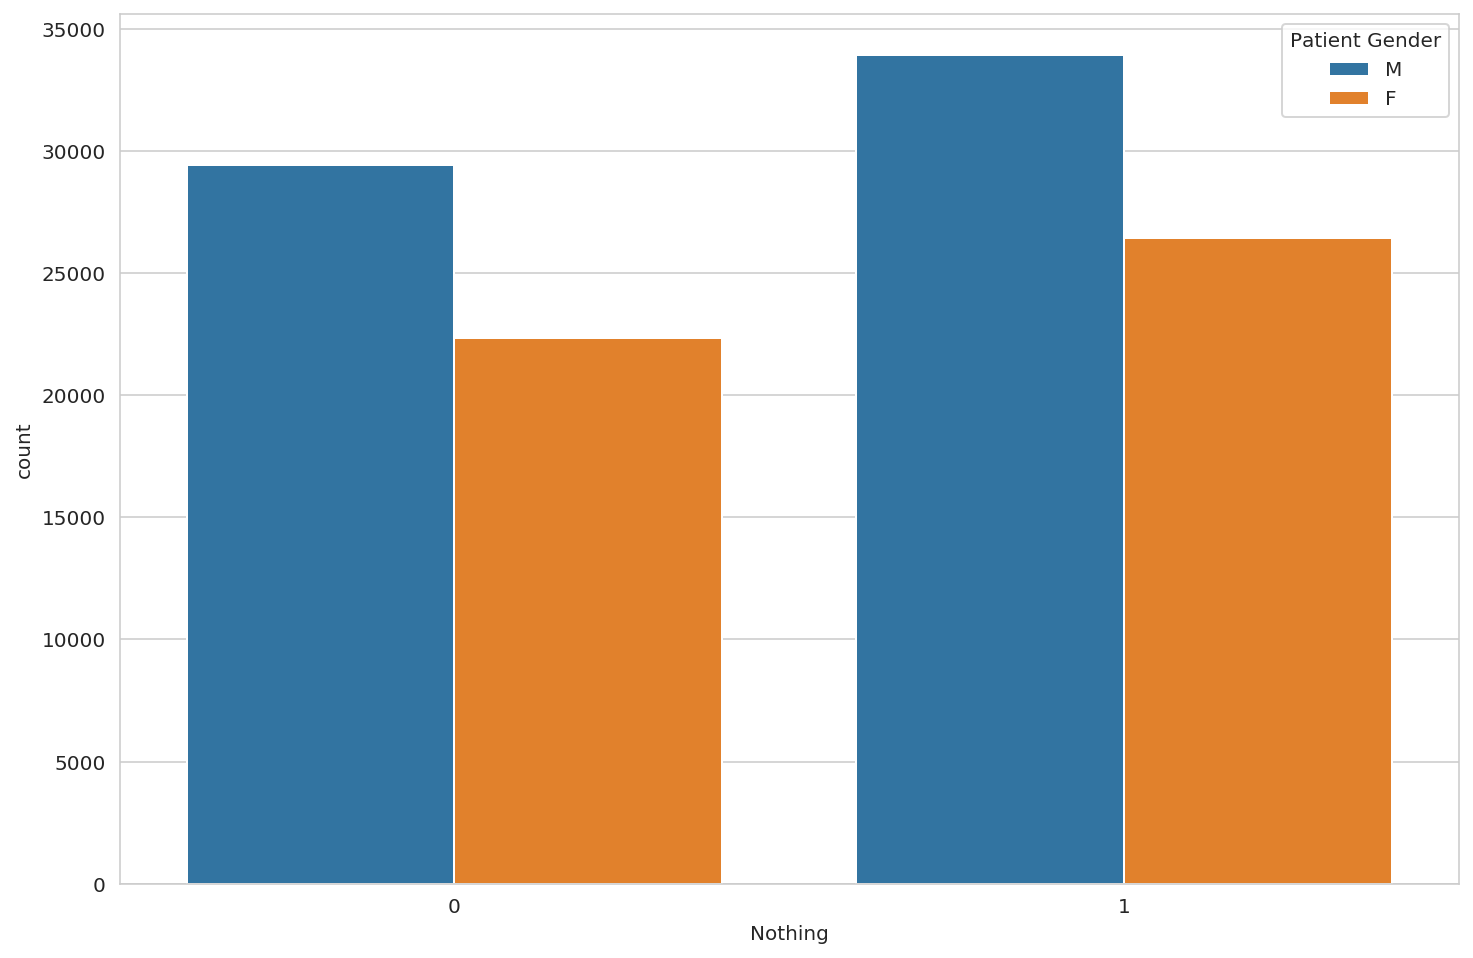

In [13]:
plt.figure(figsize=(12,8))
eda1_df['Nothing']=eda1_df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
print('Patients with and without diseases split is')
print(eda1_df['Nothing'].value_counts())
sns.countplot(x='Nothing', hue = 'Patient Gender', data=eda1_df);

In [14]:
"""
Dark theme in jupyter notebooks

# https://medium.com/@rbmsingh/making-jupyter-dark-mode-great-5adaedd814db
# https://stackoverflow.com/questions/46510192/change-the-theme-in-jupyter-notebook
"""

'\nDark theme in jupyter notebooks\n\n# https://medium.com/@rbmsingh/making-jupyter-dark-mode-great-5adaedd814db\n# https://stackoverflow.com/questions/46510192/change-the-theme-in-jupyter-notebook\n'

### Age distribution among entire dataset

In [15]:
def plot_age_distribution(input_df, gender_header = 'Patient Gender', age_header = 'Patient Age'):
    _, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
    sns.distplot(input_df[input_df[gender_header] == 'M'][age_header], ax=axes[0], label= 'Male');
    sns.distplot(input_df[input_df[gender_header] == 'F'][age_header], ax=axes[1], label= 'Female');
    return None

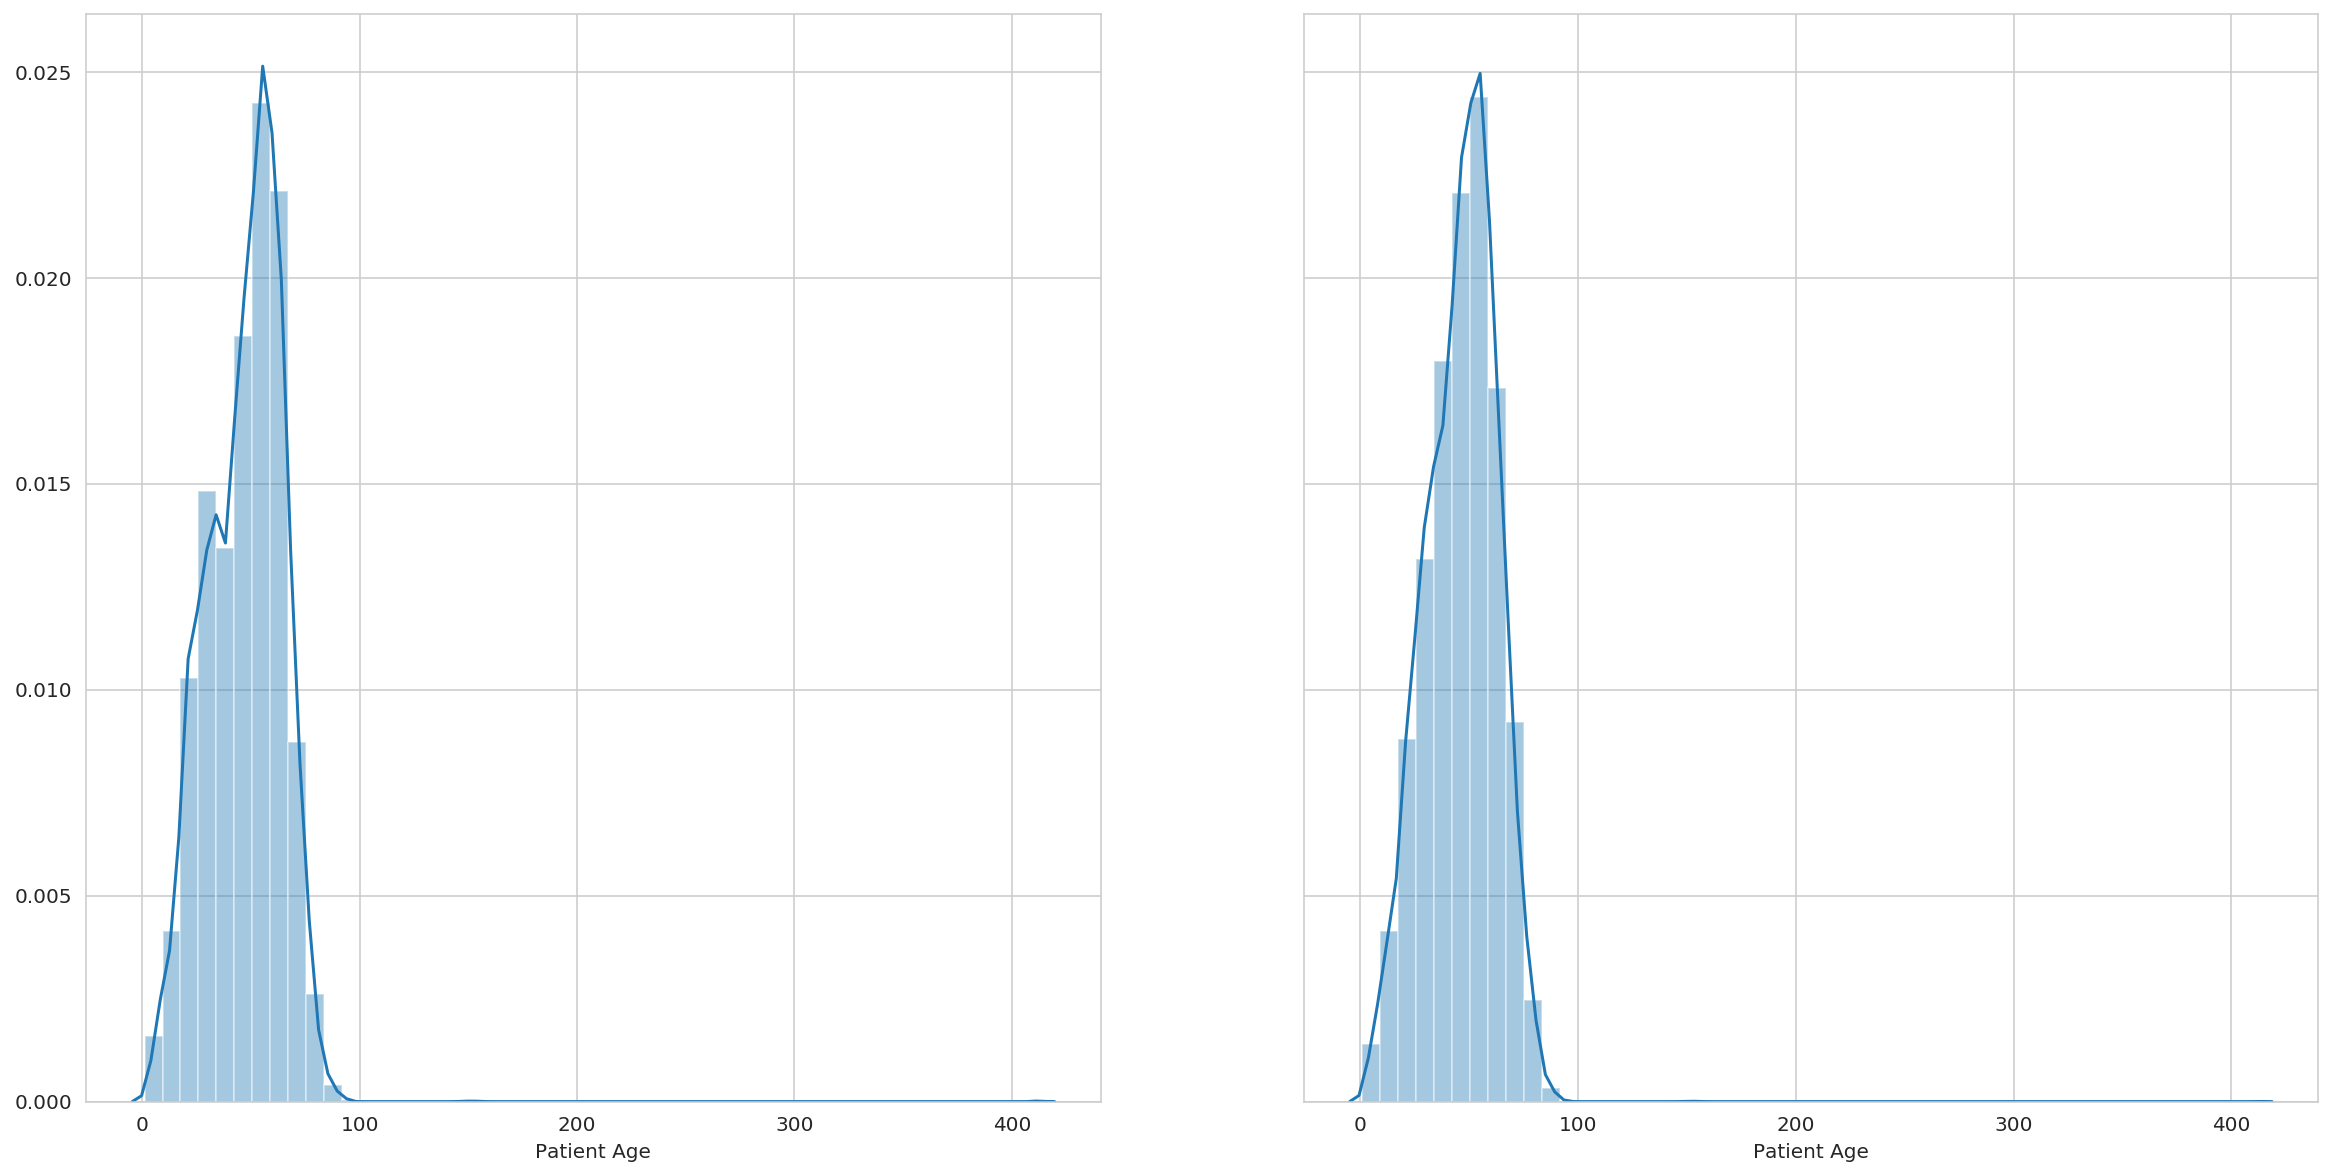

In [16]:
plot_age_distribution(eda1_df)

In [17]:
""" Age values reach upto 400 So, setting a threshold on limit to plot """
age_limit = 120
 
"""
eda1_df[eda1_df['Patient Age'] > age_limit]['Patient Age'] = age_limit
gives 'A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead' warning


https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

"""

eda1_df.loc[eda1_df['Patient Age'] > age_limit, 'Patient Age'] = age_limit
non_patients = eda1_df[eda1_df['Nothing'] == 0]
patients = eda1_df[eda1_df['Nothing'] == 1]
pneumonia_patients = eda1_df[eda1_df['Pneumonia'] == 1]
eda1_df.groupby(['Nothing', 'Patient Gender'])["Patient Age"].agg(["mean", "std"])

mean        std
Nothing Patient Gender                      
0       F               48.253122  16.180669
        M               48.168638  16.930939
1       F               45.042702  16.116994
        M               46.300071  16.848455

The dataset population has approximate normal distribution with mean around 48 yrs for non-patients and 46 for patients 
The std deviation of 16 implies there's a significant and equal spread of diseases among youth and old.

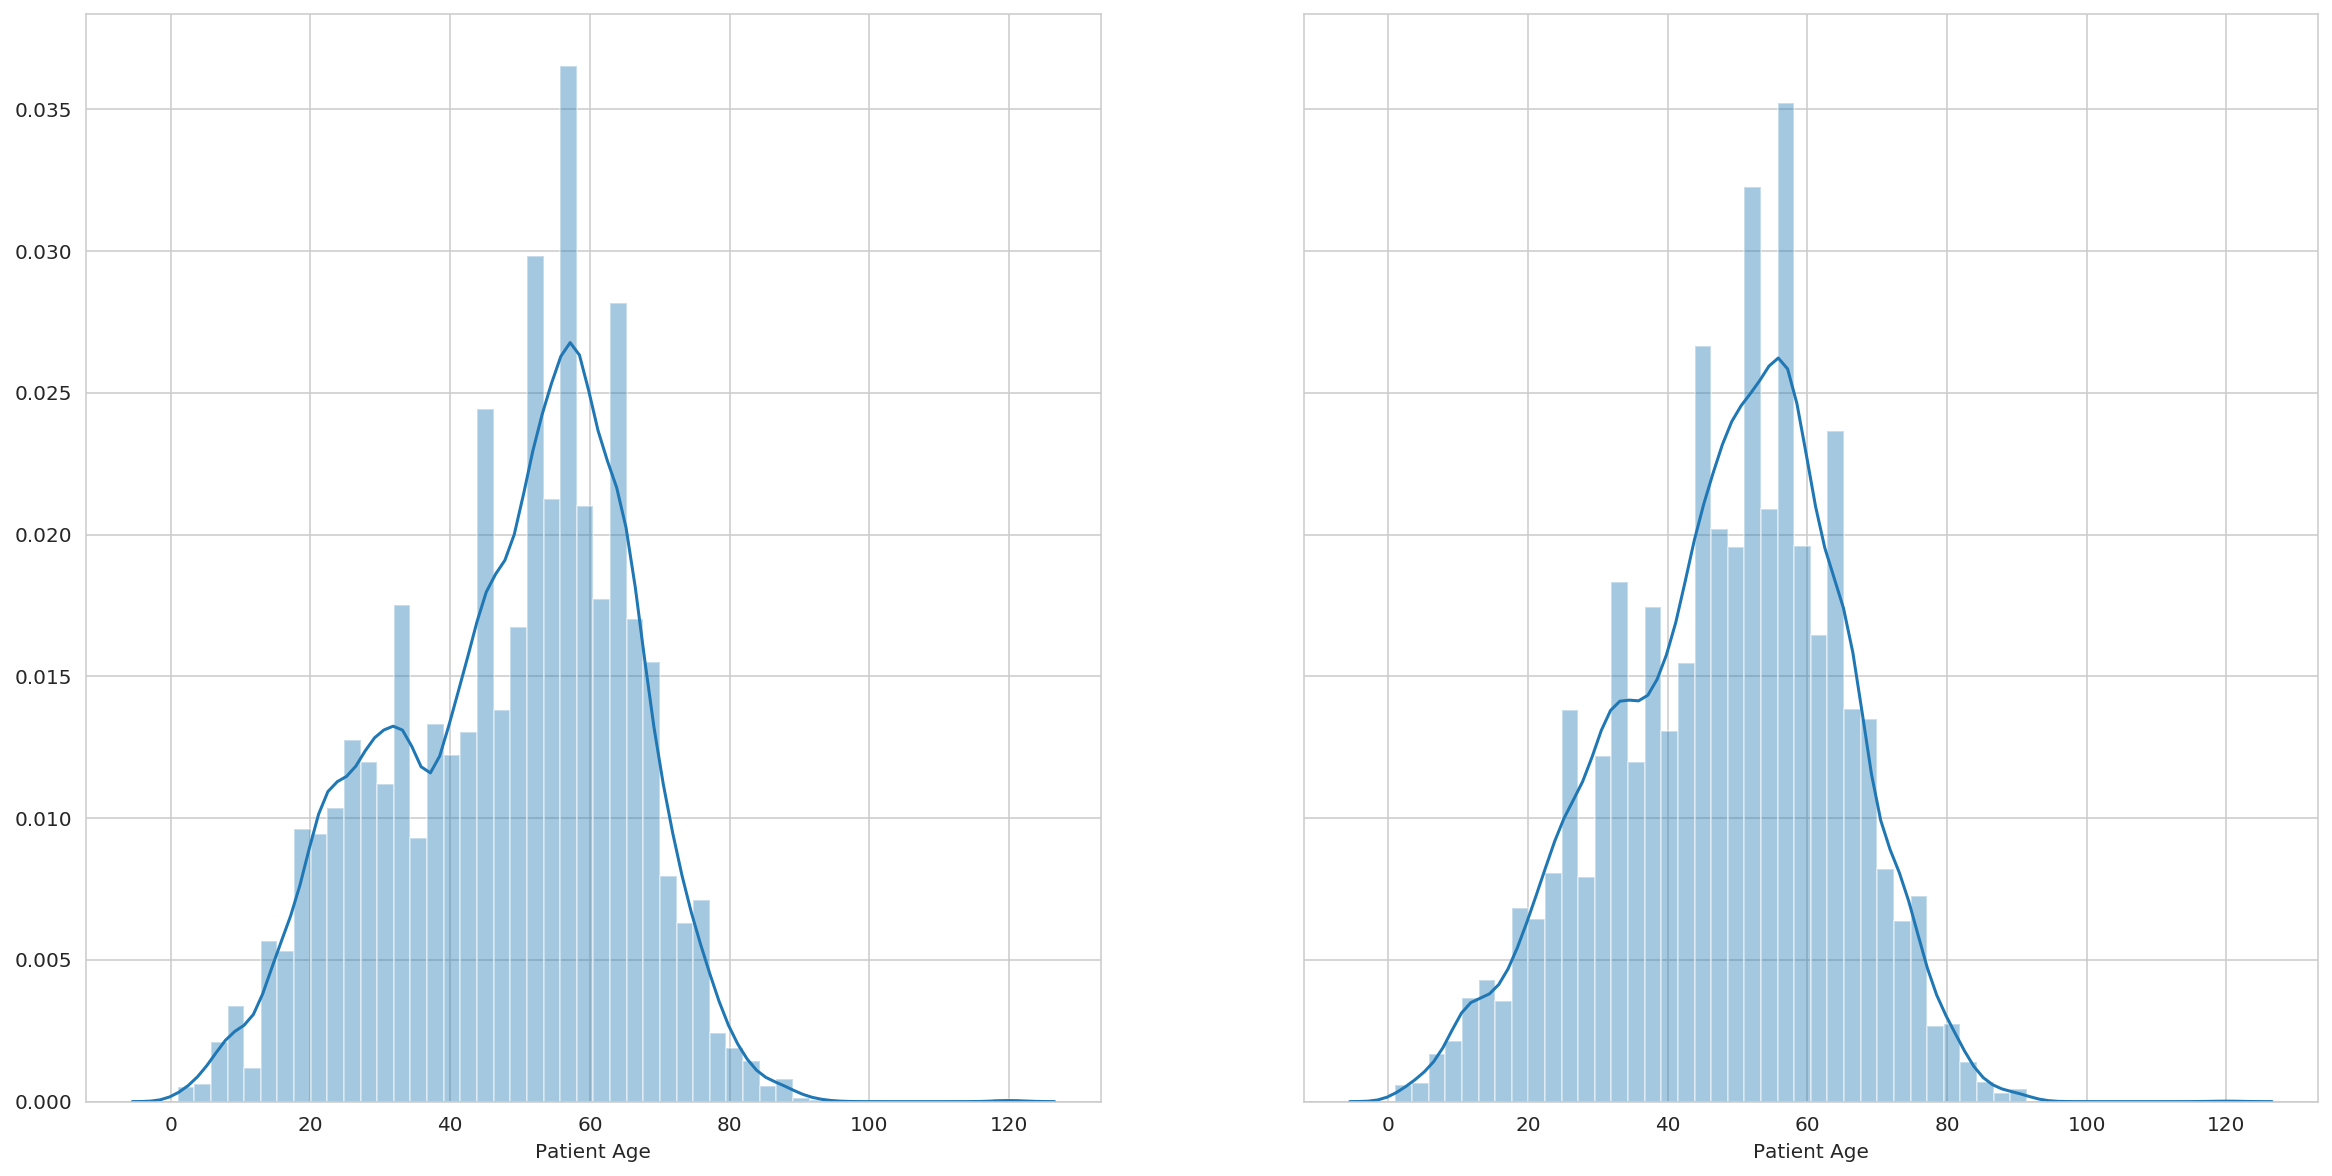

In [18]:
plot_age_distribution(non_patients)

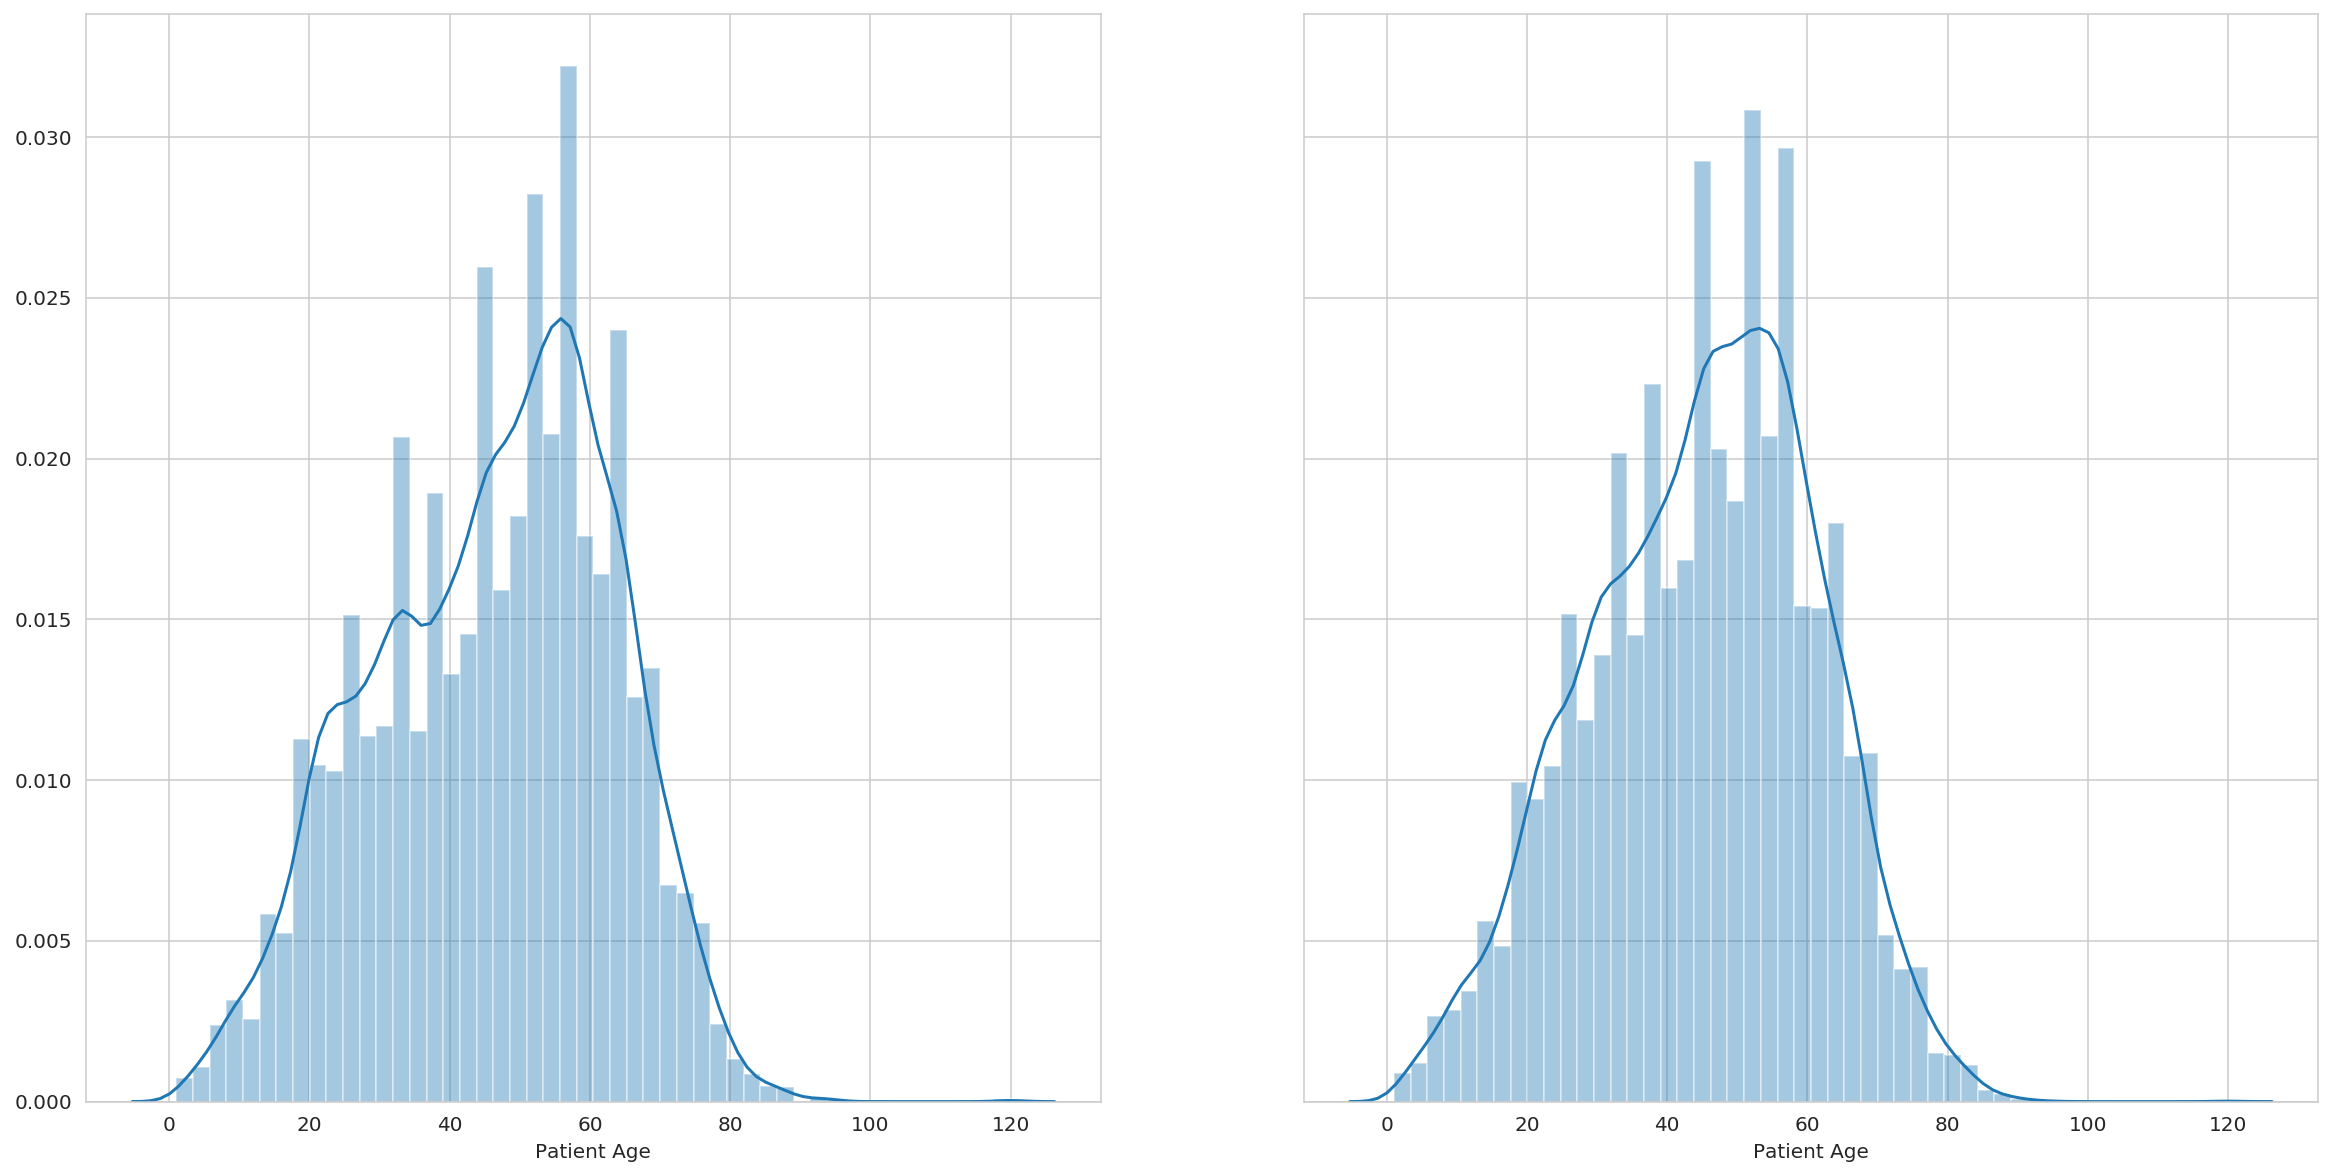

In [19]:
plot_age_distribution(patients)

Pneumonia patients have mean age of 44 and 17 years std devation

In [20]:
pneumonia_patients.groupby('Patient Gender')["Patient Age"].agg(["mean", "std"])

,mean,std
Patient Gender,,
F,44.691400,17.175885
M,44.745823,18.147111


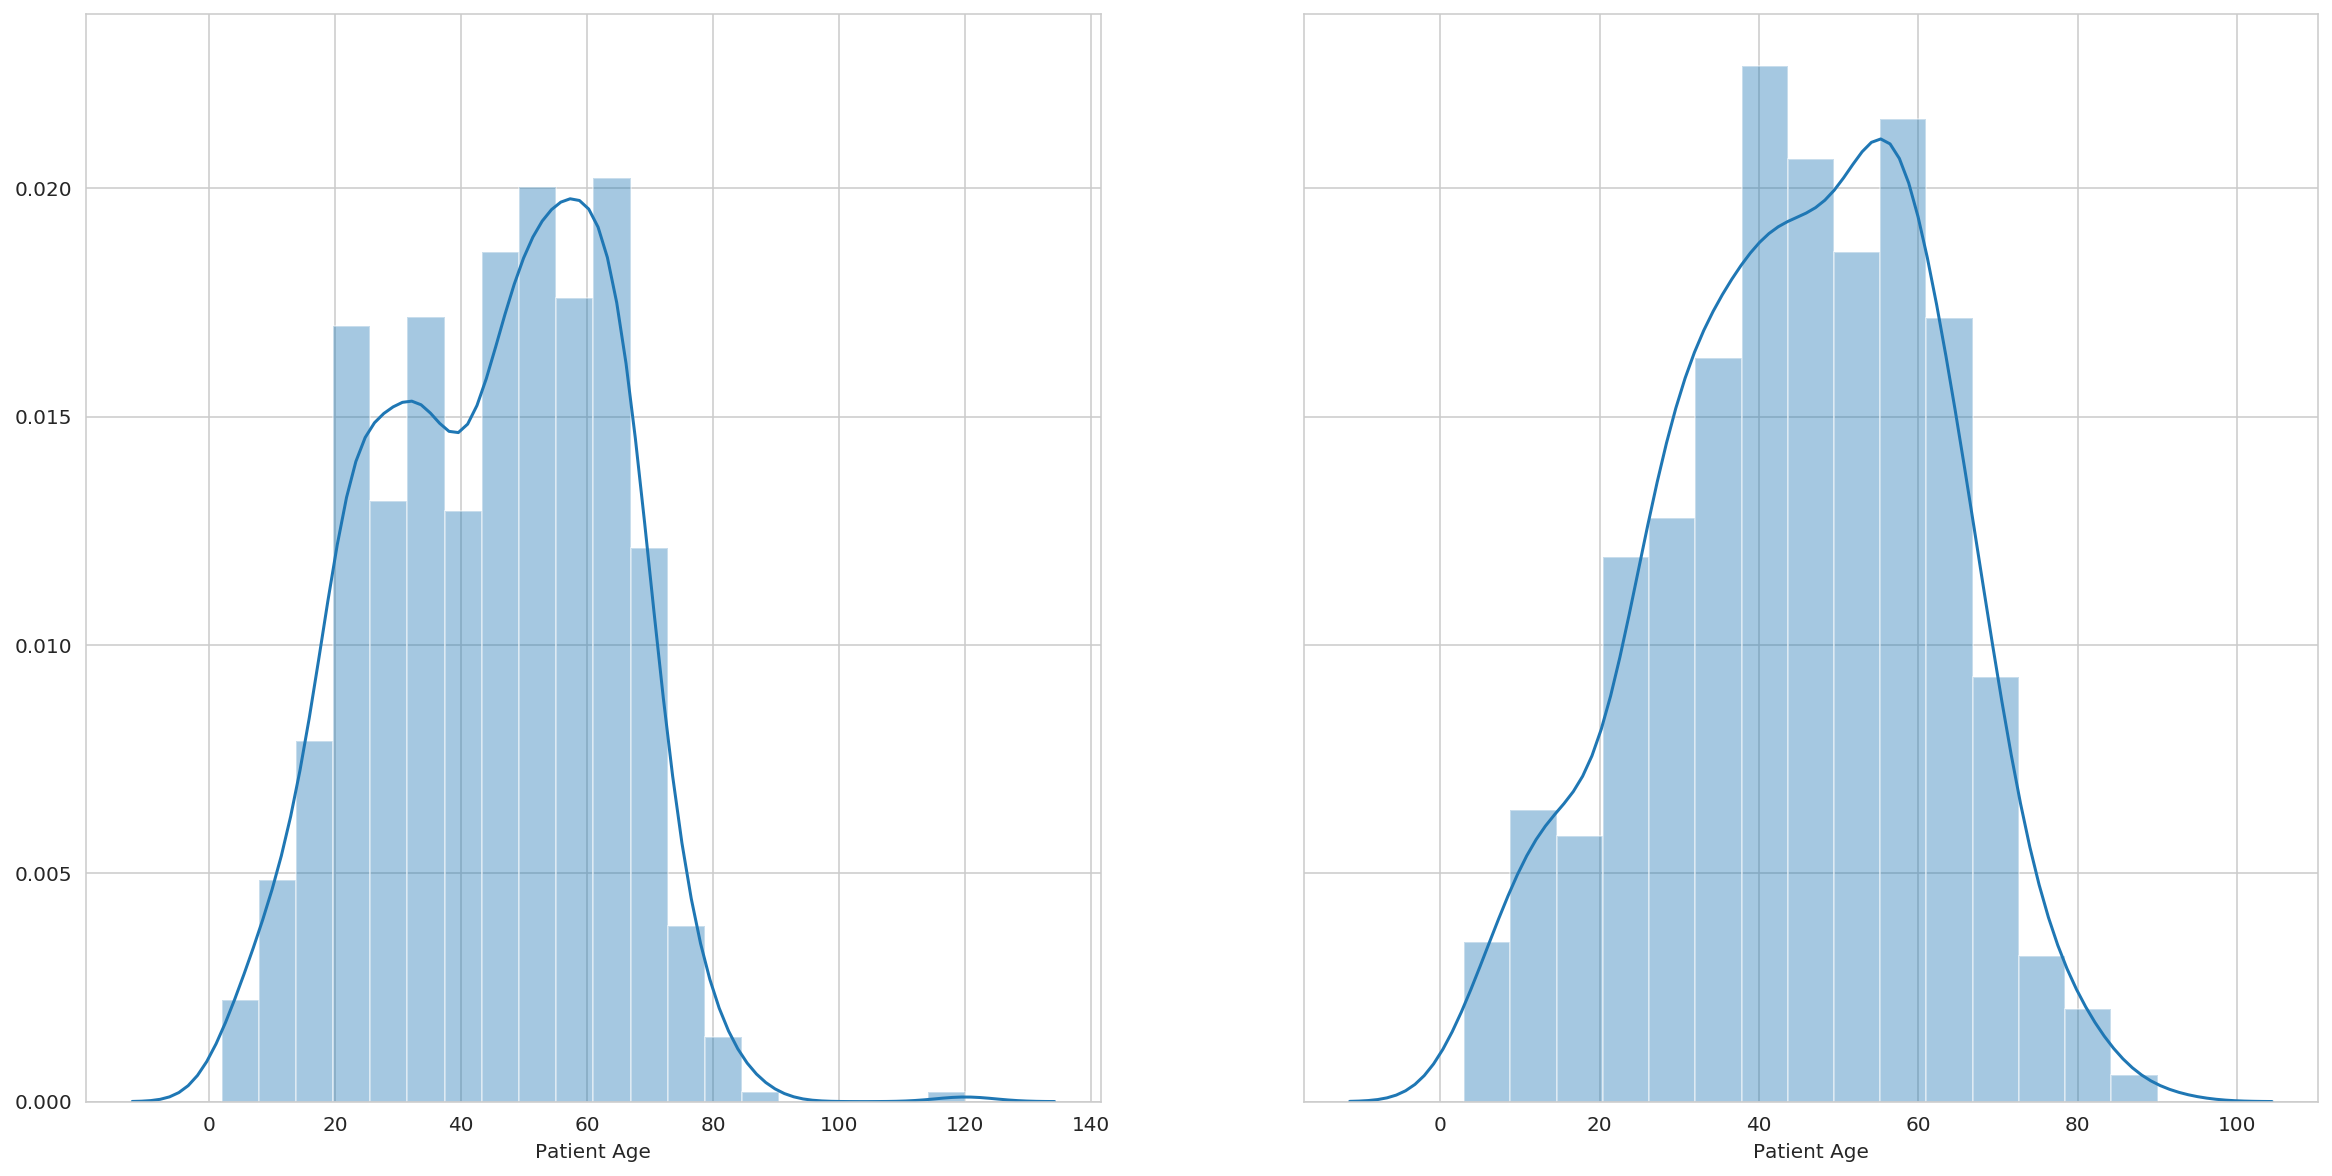

In [21]:
plot_age_distribution(pneumonia_patients)

### Multiple and single pathologies split

In [22]:
'''group by makes the column (in this case Finding labels) as index '''
#temp = eda1_df.groupby('Finding Labels').count()
data = eda1_df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
print('There are {} unique combinations of diseases in total'.format(data.shape[0]))
print('Disease split shape is', data.shape)
data.head(3)

There are 836 unique combinations of diseases in total
Disease split shape is (836, 20)


,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing
Finding Labels,,,,,,,,,,,,,,,,,,,,
No Finding,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361
Infiltration,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547
Atelectasis,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215


In [23]:
#checking if there are presence of multiple dieseases in the above case 
print(['|' in index for index in data.index.values][0:10])

[False, False, False, False, False, False, False, True, True, False]


In [24]:
#filtering those with multiple pathologies 
df1=data[['|' in index for index in data.index]].copy()

#adding Finding labels column to df1 as groupby removed it
df1['Finding Labels']=df1.index.values
print('Multiple Disease data shape is', df1.shape)
df1.head(3)

Multiple Disease data shape is (821, 21)


,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Finding Labels
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,...,1603,1603,1603,1603,1603,1603,1603,1603,1603,Effusion|Infiltration
Atelectasis|Infiltration,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,...,1350,1350,1350,1350,1350,1350,1350,1350,1350,Atelectasis|Infiltration
Atelectasis|Effusion,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,...,1165,1165,1165,1165,1165,1165,1165,1165,1165,Atelectasis|Effusion


In [25]:
#those with either single or no pathology
df2=data[['|' not in index for index in data.index]]

#eliminating rows containing 'no finding' values
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
print('Only Single Disease data shape is', df2.shape)
df2.head(3)

Only Single Disease data shape is (14, 21)


,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Finding Labels
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Infiltration,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,...,9547,9547,9547,9547,9547,9547,9547,9547,9547,Infiltration
Atelectasis,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,...,4215,4215,4215,4215,4215,4215,4215,4215,4215,Atelectasis
Effusion,3955,3955,3955,3955,3955,3955,3955,3955,3955,3955,...,3955,3955,3955,3955,3955,3955,3955,3955,3955,Effusion


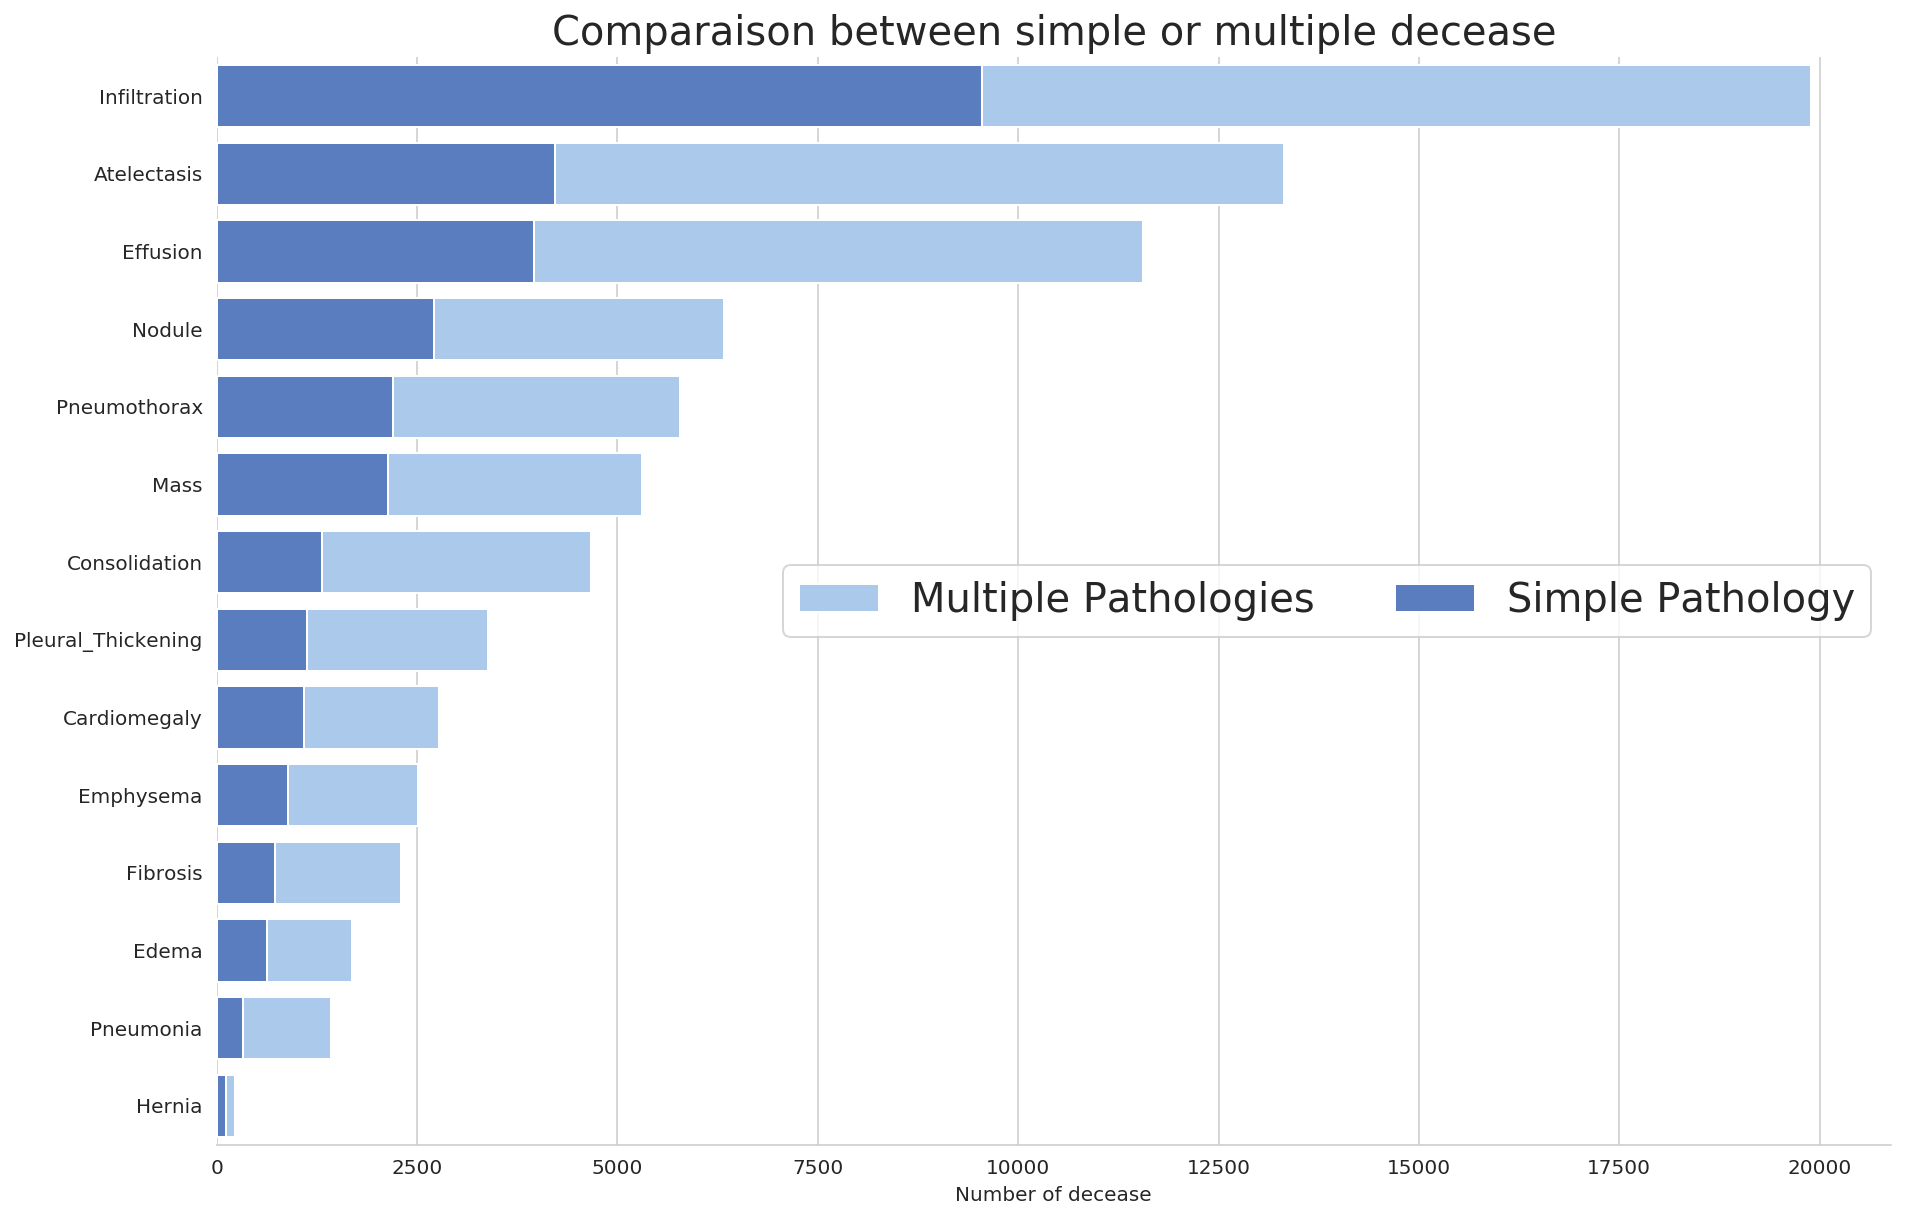

In [26]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20);      
sns.despine(left=True)

### Comorbidity of diseases - (~ coexistence of other diseases with one disease)

In [27]:
def add_disease_columns(input_df, min_cases = 30):
    df = input_df.loc[input_df['Patient ID']>min_cases,['Patient ID','Finding Labels']]
    for pathology in pathology_list:
        df[pathology]=df.apply(lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0, axis=1)
    
    #printing diseases split numbers
    print('----------------------------------------')
    for pathology in pathology_list:
        print('Total patients for {} diesase is {}'.format(pathology, df[pathology].sum()))
    print('----------------------------------------')
    return df

In [28]:
#we just keep groups of pathologies which appear more than 30 times
print('Among Patients with multiple pathologies')
df3=add_disease_columns(df1, min_cases = 30)
df3.head(3)

Among Patients with multiple pathologies
----------------------------------------
Total patients for Cardiomegaly diesase is 1154
Total patients for Emphysema diesase is 1000
Total patients for Effusion diesase is 7954
Total patients for Hernia diesase is 0
Total patients for Nodule diesase is 2613
Total patients for Pneumothorax diesase is 2301
Total patients for Atelectasis diesase is 6241
Total patients for Pleural_Thickening diesase is 1432
Total patients for Mass diesase is 2576
Total patients for Edema diesase is 1126
Total patients for Consolidation diesase is 2419
Total patients for Infiltration diesase is 8992
Total patients for Fibrosis diesase is 518
Total patients for Pneumonia diesase is 693
----------------------------------------


,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,Effusion|Infiltration,0,0,1603,0,0,0,0,0,0,0,0,1603,0,0
Atelectasis|Infiltration,1350,Atelectasis|Infiltration,0,0,0,0,0,0,1350,0,0,0,0,1350,0,0
Atelectasis|Effusion,1165,Atelectasis|Effusion,0,0,1165,0,0,0,1165,0,0,0,0,0,0,0


In [29]:
print('Patients with single pathologies')
temp=add_disease_columns(df2, min_cases = 30)
temp.head(3)

Patients with single pathologies
----------------------------------------
Total patients for Cardiomegaly diesase is 1093
Total patients for Emphysema diesase is 892
Total patients for Effusion diesase is 3955
Total patients for Hernia diesase is 110
Total patients for Nodule diesase is 2705
Total patients for Pneumothorax diesase is 2194
Total patients for Atelectasis diesase is 4215
Total patients for Pleural_Thickening diesase is 1126
Total patients for Mass diesase is 2139
Total patients for Edema diesase is 628
Total patients for Consolidation diesase is 1310
Total patients for Infiltration diesase is 9547
Total patients for Fibrosis diesase is 727
Total patients for Pneumonia diesase is 322
----------------------------------------


,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Infiltration,9547,Infiltration,0,0,0,0,0,0,0,0,0,0,0,9547,0,0
Atelectasis,4215,Atelectasis,0,0,0,0,0,0,4215,0,0,0,0,0,0,0
Effusion,3955,Effusion,0,0,3955,0,0,0,0,0,0,0,0,0,0,0


### PieChart of commorbidty among disease

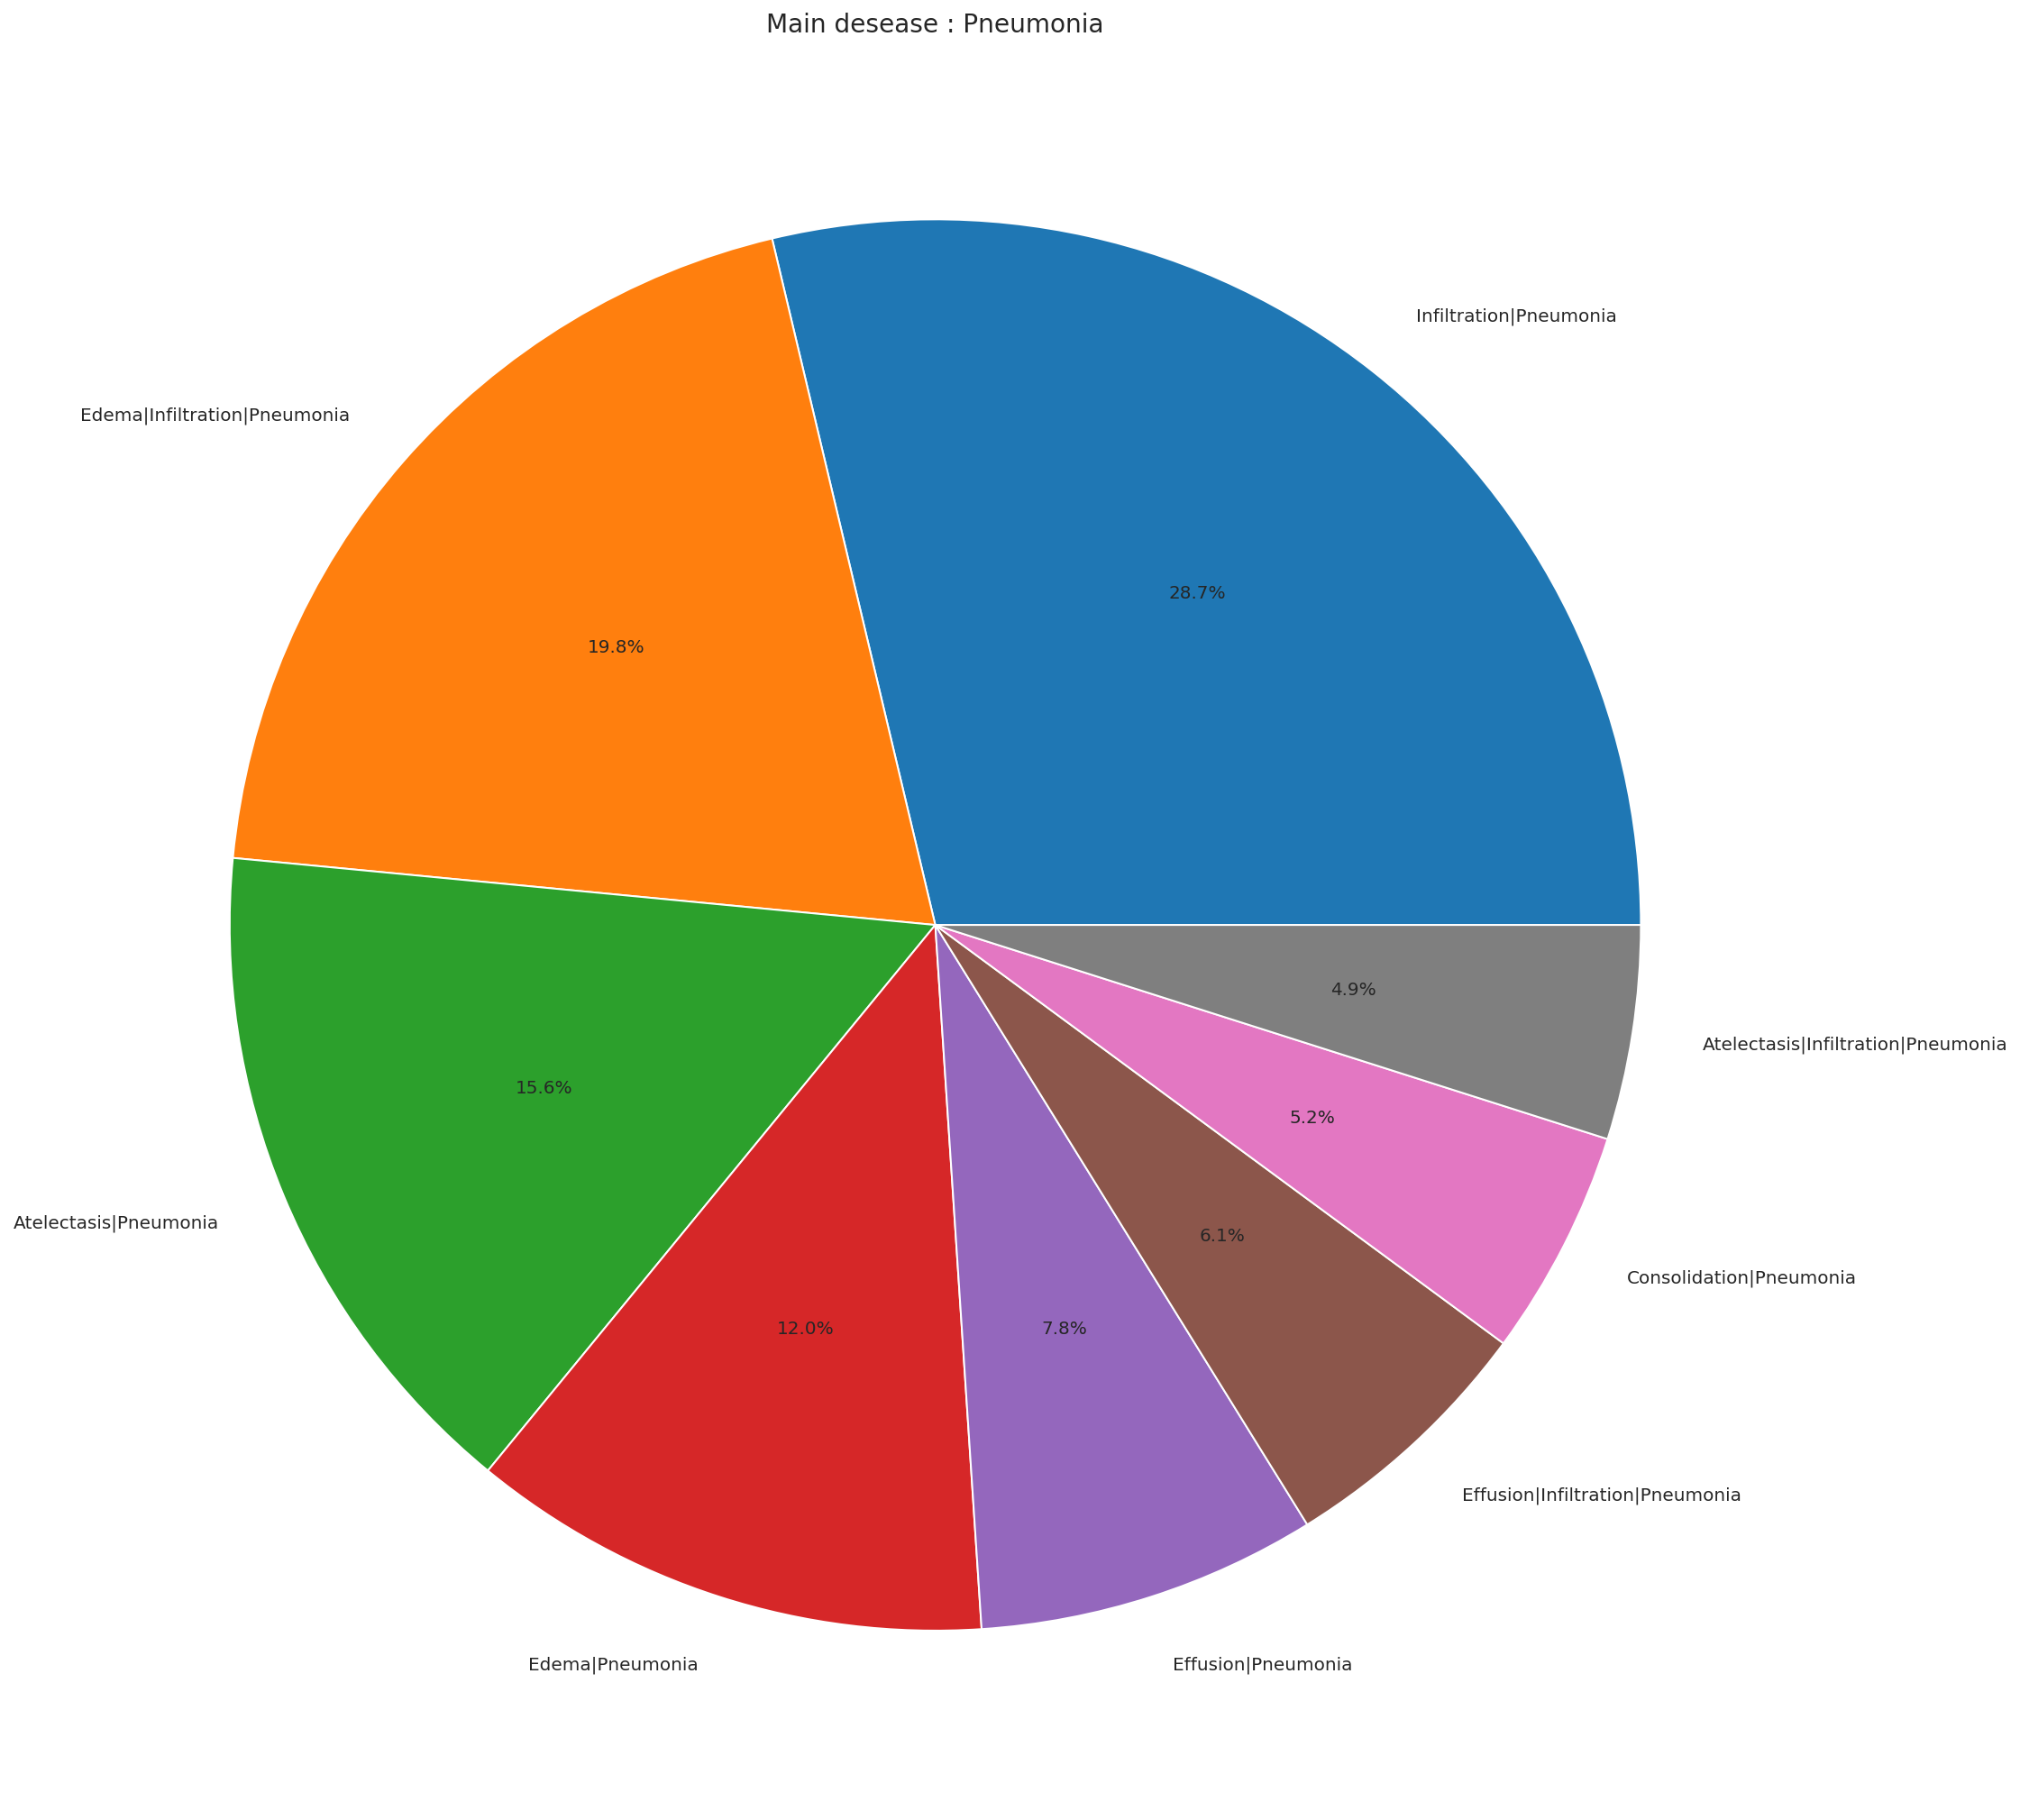

In [30]:
#'Hernia' has not enough values to figure here
df4=df3[df3['Hernia']>0]  # df4.size == 0
#remove 'Hernia' from list
pat_list=[elem for elem in pathology_list if 'Hernia' not in elem]

# PLOTTING COMORBIDITY OF PNEUMONIA
plt.figure(figsize=(18, 18))
pneumonia_split = df3[df3['Pneumonia']>0]
if pneumonia_split.size>0: 
    plt.pie(pneumonia_split['Pneumonia'],labels=pneumonia_split['Finding Labels'], autopct='%1.1f%%')
    plt.title('Main desease : '+  'Pneumonia',fontsize=14)   

##### UNCOMMENT THIS CODE FOR VISUALISING PIE CHARTS FOR ALL 14 DISEASES

```python
f, axarr = plt.subplots(13, sharex=True,figsize=(10, 140))
i=0
for pathology in pat_list :
    df4=df3[df3[pathology]>0]
    if df4.size>0:  #'Hernia' has not enough values to figure here
        axarr[i].pie(df4[pathology],labels=df4['Finding Labels'], autopct='%1.1f%%')
        axarr[i].set_title('main desease : '+pathology,fontsize=14)   
        i +=1
```

### BBox Csv EDA

In [31]:
bbox_df = pd.read_csv('BBox_List_2017.csv', delimiter=',')
print(f'There are {bbox_df.shape[0]} rows and {bbox_df.shape[1]} columns')
print('Columns in csv are')
print(list(bbox_df.columns))
bbox_df.head(5)

There are 984 rows and 9 columns
Columns in csv are
['Image Index', 'Finding Label', 'Bbox [x', 'y', 'w', 'h]', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [32]:
print('Follwoing diseases are covered in the csv')
disease_list = bbox_df['Finding Label'].unique().tolist()
print(disease_list)

Follwoing diseases are covered in the csv
['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']


In [33]:
#bbox_df.groupby(['Finding Label'])['Bbox [x', 'y', 'w', 'h]'].agg(["mean", "std", "min", "max"])
bbox_df.groupby(['Finding Label'])[['Bbox [x', 'y']].agg(["mean","min", "max"])

Bbox [x                                   y              \
                     mean         min         max        mean         min   
Finding Label                                                               
Atelectasis    411.826190   36.842328  892.203390  512.545597  125.697354   
Cardiomegaly   348.452582  169.041270  552.677966  392.336235  208.050794   
Effusion       396.521930    5.417989  863.004444  415.755706   26.006349   
Infiltrate     394.465529   87.771429  698.920635  389.101392   66.313490   
Mass           434.307625   70.433862  850.488889  366.680189   85.655712   
Nodule         502.405358   68.266667  905.887831  458.691099  182.044444   
Pneumonia      378.674568   40.093122  703.715556  416.731523  125.477934   
Pneumothorax   369.267215   21.671958  787.775661  209.356838   12.837934   

                           
                      max  
Finding Label              
Atelectasis    876.980783  
Cardiomegaly   545.934471  
Effusion       784.524868  
Infiltrate     722.759788  
Mass           690.251852  
Nodule         824.617989  
Pneumonia      787.775661  
Pneumothorax   759.220156

In [34]:
def generate_colors(n):
    colors = [0] * n;
    temp = np.random.randint(0, high = int('FFFFFF', 16), size = n).tolist()
    for index in range(n):
        colors[index] = '#' + hex(temp[index])[2:].zfill(6)
    return colors

In [35]:
#generate_colors(3)

In [36]:
def bbox_details(df):
    result = {}
    for disease in disease_list:
        temp = df[df['Finding Label'] == disease]
        width = temp['w'].mean()
        height = temp['h]'].mean()
        top_left_x = temp['Bbox [x'].mean()
        top_left_y = temp['y'].mean()
        result[disease] = [top_left_x, top_left_y + height, width, height]
    return result

In [37]:
data = bbox_details(bbox_df)

#Reading sample image for plotting bbox results
im = np.array(Image.open('00000013_005.png'), dtype=np.uint8)
print('Image shape is ' + str(im.shape))

limits =[0, im.shape[0]]
col_list = generate_colors(len(disease_list))

Image shape is (1024, 1024)


### Plotting the centre of BB of each diesease

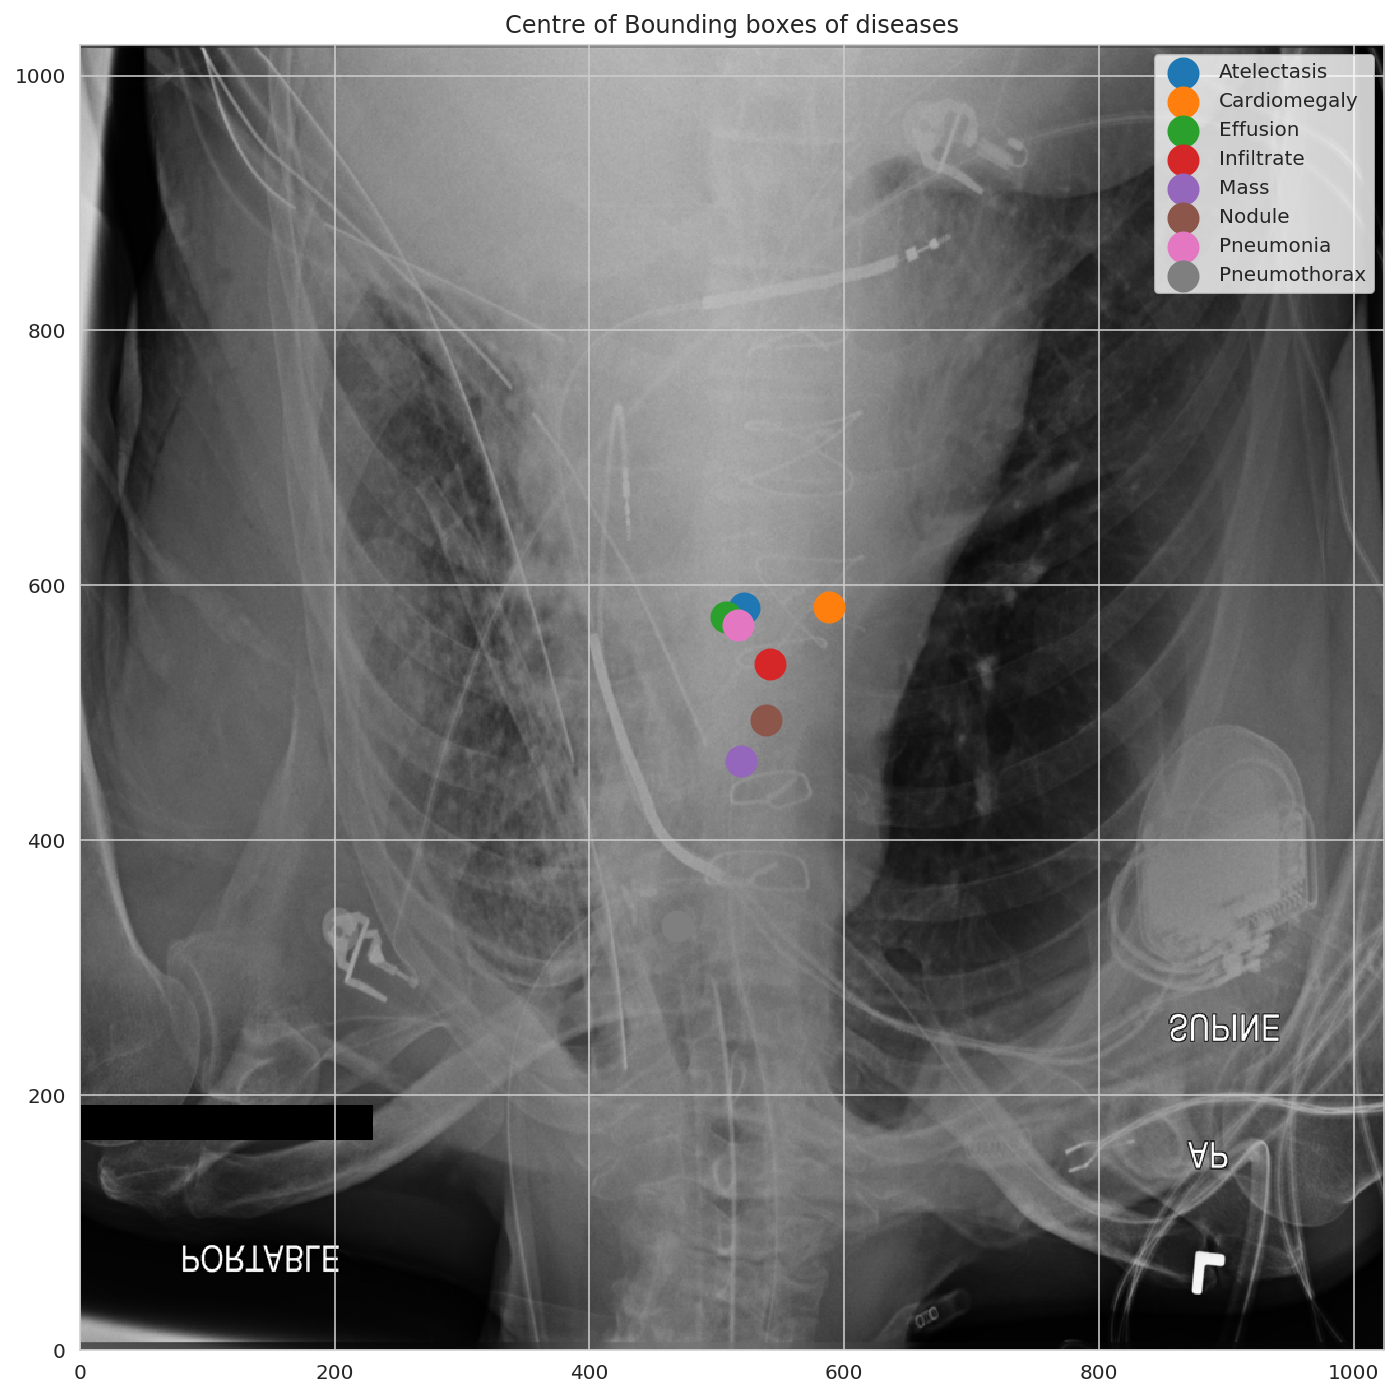

In [38]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12,12))

# Display the image
ax.imshow(im, cmap='gray')

for i in data.keys():
    bb = data[i]
    centrex, centrey = bb[0] + (bb[2] / 2.0), bb[1] - (bb[3] / 2.0)
    plt.scatter(centrex, centrey, lw = 10, label=i)

plt.title('Centre of Bounding boxes of diseases')
plt.xlim(limits)
plt.ylim(limits)
plt.legend()
plt.show()

### Plotting BB of each diesease

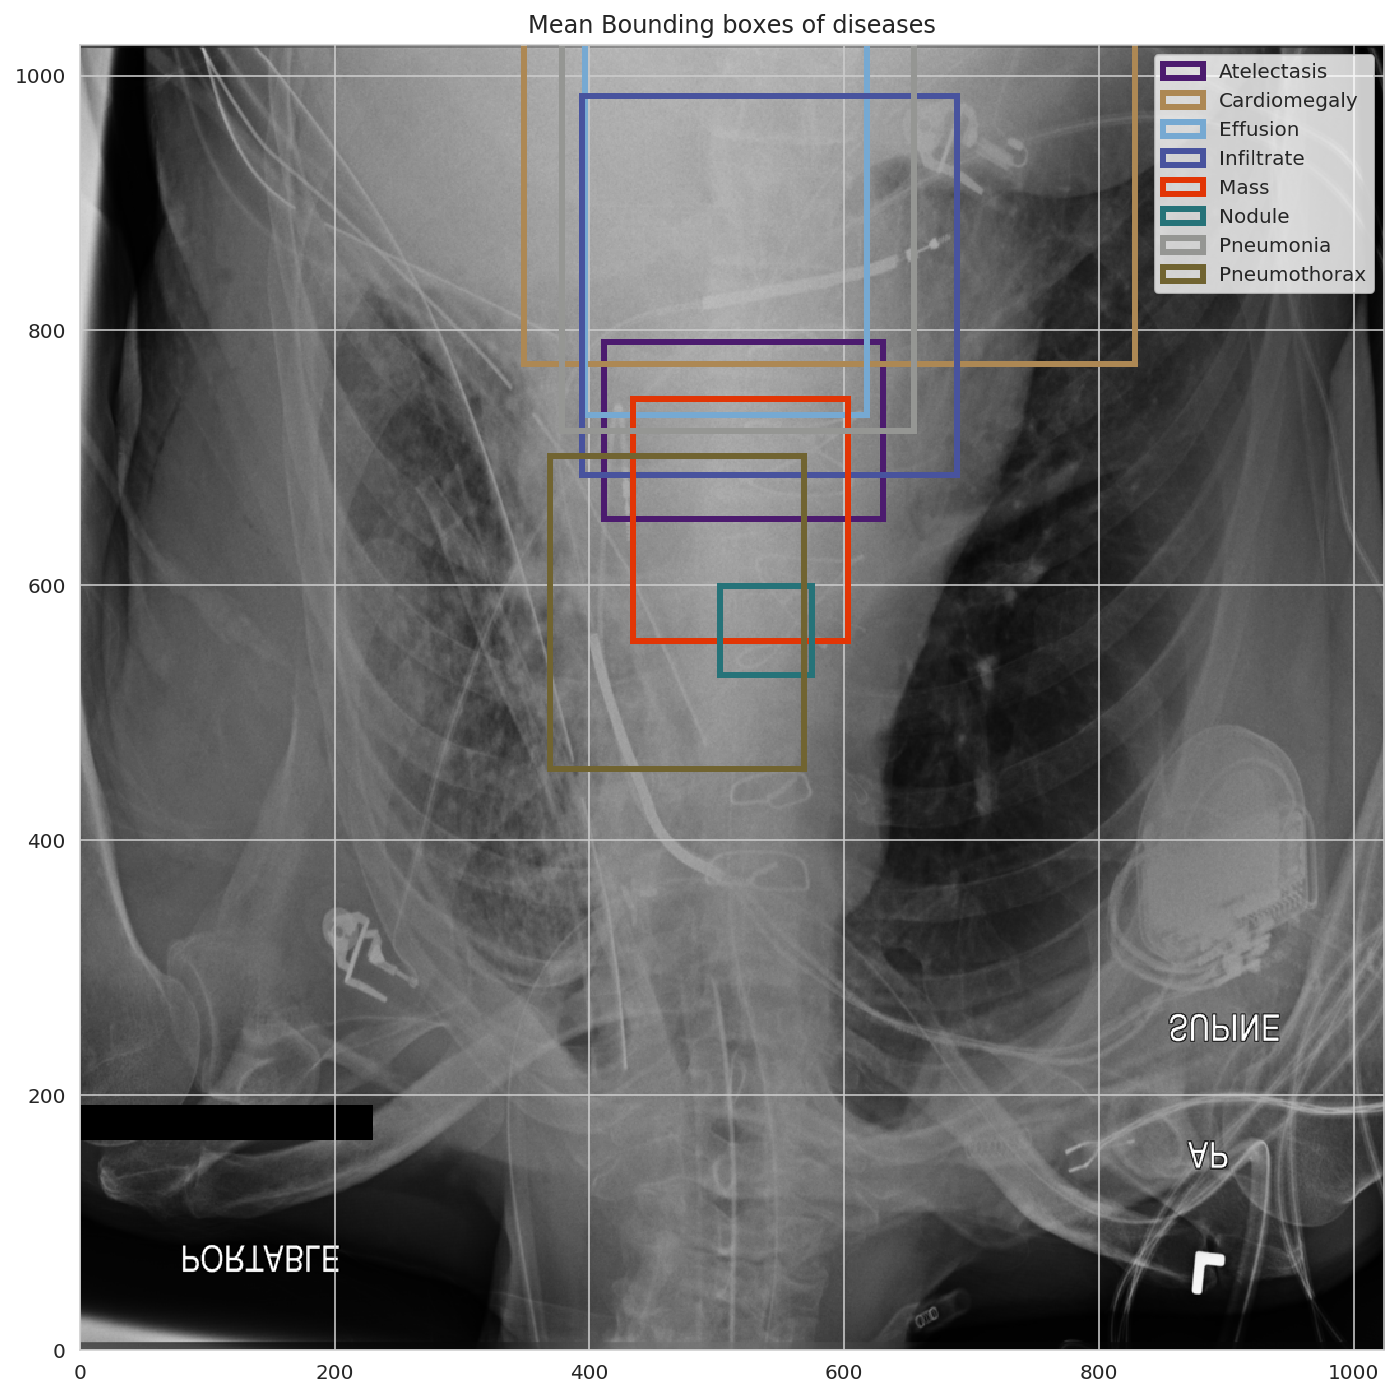

In [39]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12,12))

# Display the image
ax.imshow(im, cmap='gray')

"""
Reference
---------
https://stackoverflow.com/questions/21445005/drawing-rectangle-with-border-only-in-matplotlib
https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image
"""

for index,key in enumerate(data):
    bb = data[key]
    ax.add_patch(patches.Rectangle((bb[0], bb[1]), bb[2], bb[3], ec = col_list[index], fill = None, lw =3, label = key))

ax.set_title('Mean Bounding boxes of diseases')
plt.setp(ax, xlim=limits, ylim=limits)
plt.legend()
plt.show()

### Conclusion from EDA of demographics

1. Pneumonia percentage is very less among the dataset - imbalanced ratio of positve and negative labels
2. Almost half the population doesnt have any disease
3. Pneumonia affects less people compared to other diseases
4. There is equal contribution from Male and Female participants
5. The dataset has Mean age ~ 48 yrs, Std.dev ~ 16 yrs means target age  group of the algorithm should be mostly from 30 to 65; This applies to Pneumonia too. But in general there is some contibution from other age groups too 
6. Most disease occur in comborbidity with other diseases
7. In case of Pneumonia, it is found to coexist primarily from Infiltration, Edema, Atelectasis
8. This fact is reflected in the bounding boxes proximity for the diseases

Reference links
---------------

`Installing packages in nb with yes option enabled`

```shell
!conda install seaborn --yes
```

https://stackoverflow.com/questions/39826250/conda-stuck-on-proceed-y-n-when-updating-packages-in-ipython-console



`To load from google drive :`

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

``` python
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AIHCND/Data_Entry_2017.csv'
```